# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Maulana Imamul Khaq
- **Email:** maolana.khaq@mhs.unsoed.ac.id
- **ID Dicoding:** maulana_mhq

## Menentukan Pertanyaan Bisnis

- Bagaimana tren transaksi penjualan di beberapa tahun terakhir?
- Apa methode pembayaran yang paling banyak digunakan oleh customer?
- Bagaimana persebaran asal kota customer?
- Kategori produk apa yang memiliki rata-rata review score tertinggi?
- Bagaimana pengaruh antara lama waktu pengiriman dan biaya pengiriman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
from folium.plugins import MarkerCluster,FastMarkerCluster

## Data Wrangling

### Gathering Data

In [2]:
root_dir = './dataset/'
customers = pd.read_csv(root_dir+"olist_customers_dataset.csv")
geolocation= pd.read_csv(root_dir+"olist_geolocation_dataset.csv")
order_items = pd.read_csv(root_dir+"olist_order_items_dataset.csv")
order_payments = pd.read_csv(root_dir+"olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(root_dir+"olist_order_reviews_dataset.csv")
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
orders = pd.read_csv(root_dir+"olist_orders_dataset.csv",parse_dates=date_cols)
products = pd.read_csv(root_dir+"olist_products_dataset.csv")
sellers = pd.read_csv(root_dir+"olist_sellers_dataset.csv")
tables = {
    'customers' :customers,
    'geolocation':geolocation,
    'order_items':order_items,
    'order_payments':order_payments,
    'order_reviews':order_reviews,
    'orders' :orders,
    'products':products,
    'sellers':sellers
}

In [3]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [5]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [6]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [7]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [8]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [9]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [10]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

### Assessing Data

In [11]:
for table,df in tables.items():
    print("Data: "+table)
    print(df.info())

Data: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Data: geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocat

In [12]:
sample_count = {}
duplicate_count = {}
for table,df in tables.items():
    sample_count[table] = len(df)
    duplicate_count[table] = df.duplicated().sum()

sample_df = pd.DataFrame.from_dict(sample_count,orient='index',columns=['Total Samples']) 
duplicate_df = pd.DataFrame.from_dict(duplicate_count,orient='index',columns=['Duplicates'])

pd.concat([sample_df,duplicate_df],axis=1)

Total Samples  Duplicates
customers               99441           0
geolocation           1000163      261831
order_items            112650           0
order_payments         103886           0
order_reviews           99224           0
orders                  99441           0
products                32951           0
sellers                  3095           0

In [ ]:
detailed_db = pd.DataFrame({
    'dataset' : [],
    'nrows' : [],
    'ncols' :[],
    'null_amount' : [],
    'names_of_null_cols' : [],
    'num_null_cols' : []
})

In [49]:
null_samples = {}

for table,df in tables.items():
    null_samples[table] = df.isna().sum()
    print(f"Table: {table}")
    print(null_samples[table])

Table: customers
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Table: geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Table: order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Table: order_payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Table: order_reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0

In [50]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [51]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
delivery_time                    93809
dtype: int64

### Cleaning Data

In [14]:
tables['geolocation'] = geolocation.drop_duplicates()
tables['geolocation']

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000155                        99965       -28.180655       -52.034367   
1000156                        99950       -28.072188       -52.011272   
1000157                        99950       -28.068864       -52.012964   
1000158                        99950       -28.068639       -52.010705   
1000161                        99980       -28.388932       -51.846871   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000155       agua santa                RS  
1000156         tapejara                RS  
1000157         tapejara                RS  
1000158         tapejara                RS  
1000161  david canabarro                RS  

[738332 rows x 5 columns]

## Exploratory Data Analysis (EDA)

In [39]:
customers.describe(include='all')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

### Jumlah customer berdasarkan kota

In [92]:
cust_city_count =  customers.groupby(by="customer_city").agg({'customer_id':'nunique'}).sort_values(by='customer_id', ascending=False).reset_index()
cust_city_count.rename(columns={'customer_id': 'customer_count'}, inplace=True)
cust_city_count.to_csv('./dashboard/customer_by_city.csv')
cust_city_count

customer_city  customer_count
0          sao paulo           15540
1     rio de janeiro            6882
2     belo horizonte            2773
3           brasilia            2131
4           curitiba            1521
...              ...             ...
4114          ibiara               1
4115      rio espera               1
4116  rio dos indios               1
4117  rio dos cedros               1
4118          lagoao               1

[4119 rows x 2 columns]

### Jumlah seller berdasarkan kota

In [91]:
seller_city_count =  sellers.groupby(by="seller_city").agg({'seller_id':'nunique'}).sort_values(by='seller_id', ascending=False).reset_index()
seller_city_count.rename(columns={'seller_id': 'seller_count'}, inplace=True)
seller_city_count.to_csv('./dashboard/seller_by_city.csv')
seller_city_count

seller_city  seller_count
0         sao paulo           694
1          curitiba           127
2    rio de janeiro            96
3    belo horizonte            68
4    ribeirao preto            52
..              ...           ...
606           ivoti             1
607       itirapina             1
608   itau de minas             1
609          itapui             1
610           xaxim             1

[611 rows x 2 columns]

In [54]:
order_items.describe()

order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  
count  112650.000000  
mean       19.990320  
min         0.000000  
25%        13.080000  
50%        16.260000  
75%        21.150000  
max       409.680000  
std        15.806405

### Jumlah order berdasarkan status

In [63]:
order_by_status =  orders.groupby(by="order_status").agg({'order_id':'nunique'}).sort_values(by='order_id', ascending=False).reset_index()
order_by_status

order_status  order_id
0    delivered     96478
1      shipped      1107
2     canceled       625
3  unavailable       609
4     invoiced       314
5   processing       301
6      created         5
7     approved         2

### Total transaksi berdasarkan tipe metode pembayaran

In [74]:
spent_by_payment = pd.merge(order_payments,order_items,on='order_id',how='inner')
total_spent_by_payment =  spent_by_payment.groupby(by='payment_type').agg({'price':'sum'}).sort_values(by='price',ascending=False).reset_index()
total_spent_by_payment

payment_type        price
0  credit_card  10974357.30
1       boleto   2391525.66
2      voucher    659473.64
3   debit_card    183758.74

## Visualization & Explanatory Analysis

### Trend Penjualan per bulan di 3 tahun terakhir

In [103]:
# Filter orders by year 2017
# orders_by_year = orders.loc[orders['order_purchase_timestamp'].dt.year == 2017].copy()
orders_by_year = orders.copy()

# Group by 'year_month' and count the number of orders
orders_by_year['year_month'] = orders_by_year['order_purchase_timestamp'].dt.to_period('M')
monthly_order_counts = orders_by_year.groupby(['year_month'])['order_id'].count().reset_index()
monthly_order_counts.rename(columns={'order_id': 'purchase_count'}, inplace=True)

# Extract and format the month names
monthly_order_counts['month_name'] = monthly_order_counts['year_month'].dt.strftime('%B')
# monthly_order_counts.to_csv('./dashboard/monthly_order.csv')
monthly_order_counts

year_month  purchase_count month_name
0     2016-09               4  September
1     2016-10             324    October
2     2016-12               1   December
3     2017-01             800    January
4     2017-02            1780   February
5     2017-03            2682      March
6     2017-04            2404      April
7     2017-05            3700        May
8     2017-06            3245       June
9     2017-07            4026       July
10    2017-08            4331     August
11    2017-09            4285  September
12    2017-10            4631    October
13    2017-11            7544   November
14    2017-12            5673   December
15    2018-01            7269    January
16    2018-02            6728   February
17    2018-03            7211      March
18    2018-04            6939      April
19    2018-05            6873        May
20    2018-06            6167       June
21    2018-07            6292       July
22    2018-08            6512     August
23    2018-09              16  September
24    2018-10               4    October

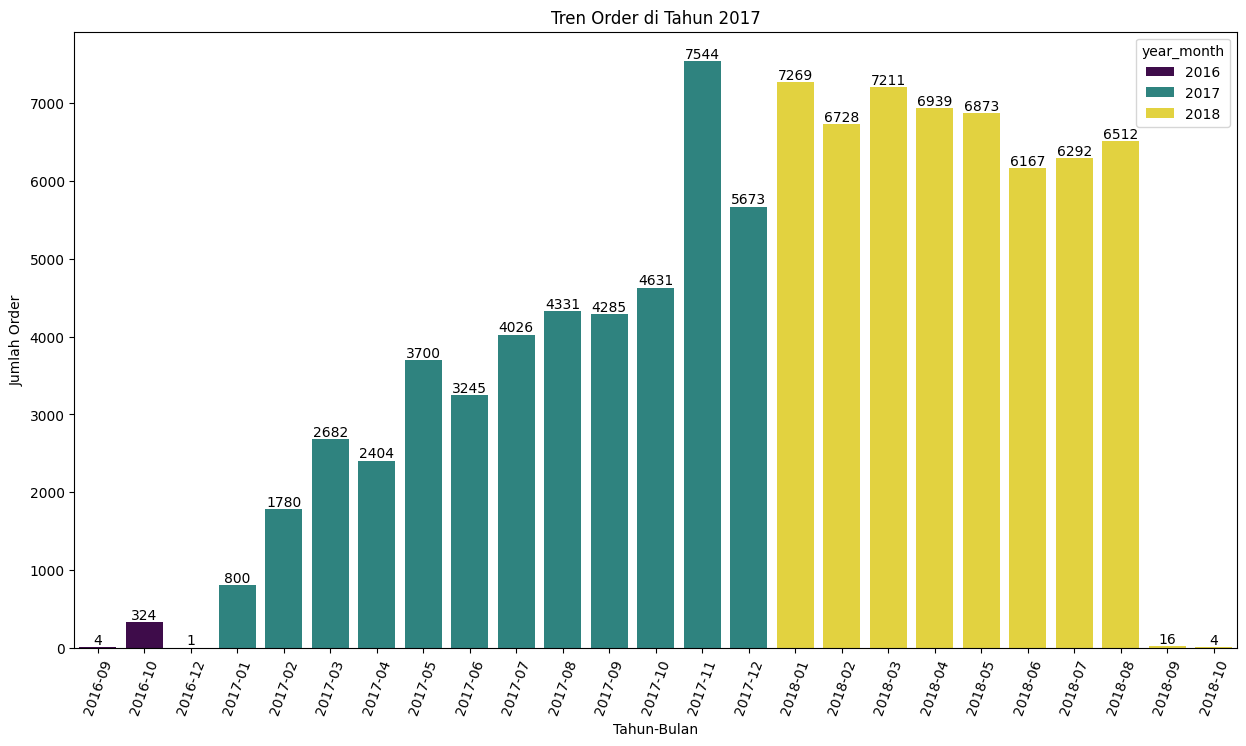

In [88]:
plt.figure(figsize=(15, 8))
g = sns.barplot(data=monthly_order_counts, x='year_month', y='purchase_count',palette='viridis',hue=monthly_order_counts['year_month'].dt.year)
plt.title('Tren Order di Tahun 2017')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=70)
for index, row in monthly_order_counts.iterrows():
    g.text(index, row['purchase_count'], f"{row['purchase_count']}", color='black', ha="center", va='bottom')
plt.show()

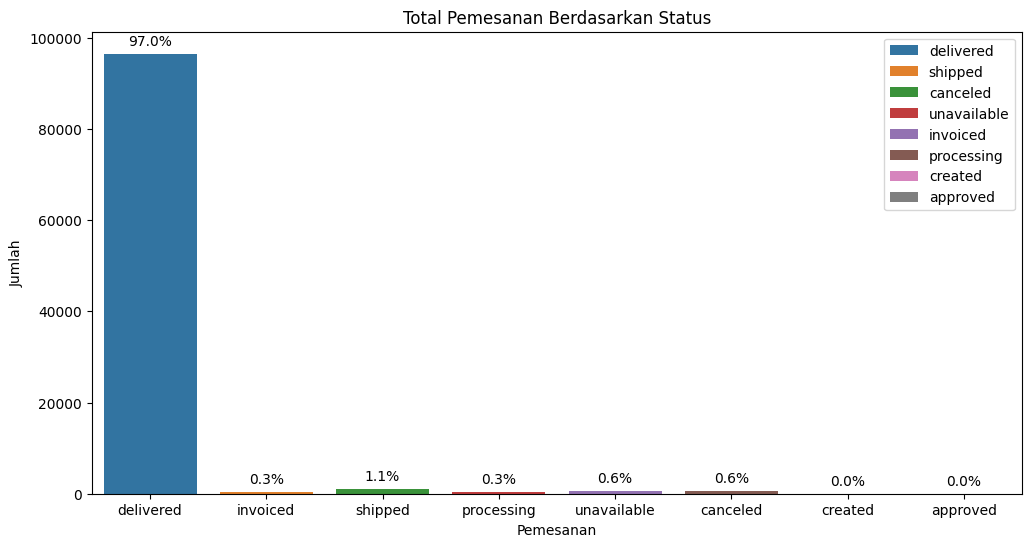

In [19]:
order_status = orders['order_status'].value_counts()
plt.figure(figsize=(12,6))
g =sns.countplot(orders,x='order_status',hue='order_status')
g.set_title("Total Pemesanan Berdasarkan Status")
g.set_xlabel("Pemesanan")
g.set_ylabel("Jumlah")
g.set_label('Order status')
total = len(orders)
for p in g.patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.1f}%'
    g.annotate(percentage, 
               (p.get_x() + p.get_width() / 2., height), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
plt.legend(order_status.index.tolist())
plt.show()

### Metode pembayaran yang paling banyak digunakan oleh customer

In [97]:
payment_type_count = order_payments['payment_type'].value_counts().reset_index()
payment_type_count.to_csv('./dashboard/payment_type_count.csv')
payment_type_count

payment_type  count
0  credit_card  76795
1       boleto  19784
2      voucher   5775
3   debit_card   1529
4  not_defined      3

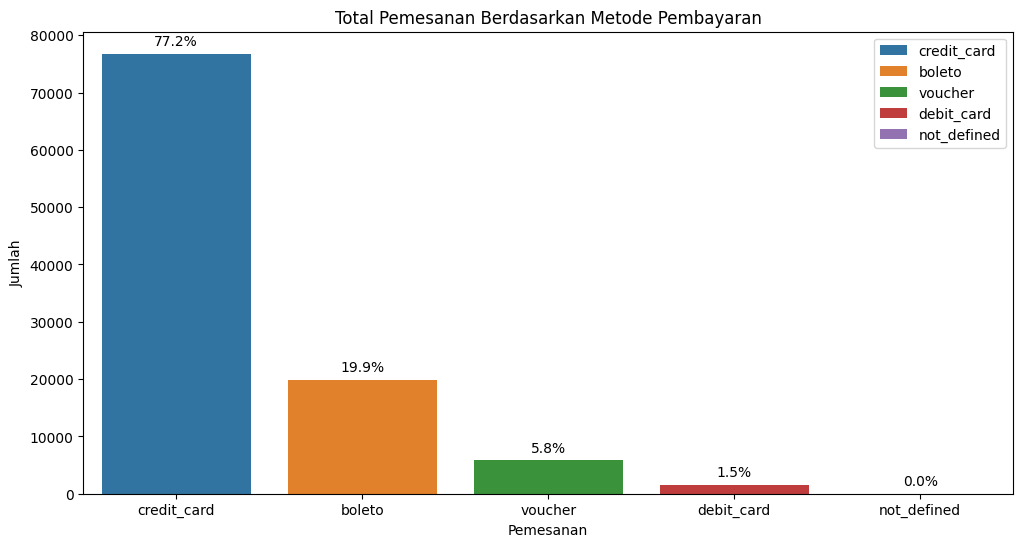

In [20]:
payment_count = order_payments['payment_type'].value_counts()
plt.figure(figsize=(12,6))
g =sns.countplot(order_payments,x='payment_type',hue='payment_type')
g.set_title("Total Pemesanan Berdasarkan Metode Pembayaran")
g.set_xlabel("Pemesanan")
g.set_ylabel("Jumlah")
total = len(orders)
for p in g.patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.1f}%'
    g.annotate(percentage, 
               (p.get_x() + p.get_width() / 2., height), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
plt.legend(payment_count.index.to_list())
plt.show()

### Persebaran kota customer

In [21]:
customer_zip = customers.rename(columns={'customer_zip_code_prefix':'geolocation_zip_code_prefix'})
aggregated_geo = tables['geolocation'].groupby('geolocation_zip_code_prefix').agg({'geolocation_lat':'mean', 'geolocation_lng':'mean'}).reset_index()
# aggregated_geo
combine = pd.merge(customer_zip,aggregated_geo,how='inner',on='geolocation_zip_code_prefix')

In [22]:
combine

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99158  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99159  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99160  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99161  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99162  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       geolocation_zip_code_prefix          customer_city customer_state  \
0                            14409                 franca             SP   
1                             9790  sao bernardo do campo             SP   
2                             1151              sao paulo             SP   
3                             8775        mogi das cruzes             SP   
4                            13056               campinas             SP   
...                            ...                    ...            ...   
99158                         3937              sao paulo             SP   
99159                         6764        taboao da serra             SP   
99160                        60115              fortaleza             CE   
99161                        92120                 canoas             RS   
99162                         6703                  cotia             SP   

       geolocation_lat  geolocation_lng  
0           -20.499273       -47.396658  
1           -23.728396       -46.542250  
2           -23.531309       -46.656690  
3           -23.500670       -46.186348  
4           -22.975708       -47.143140  
...                ...              ...  
99158       -23.586179       -46.499652  
99159       -23.616789       -46.767716  
99160        -3.735628       -38.510775  
99161       -29.949964       -51.168380  
99162       -23.596649       -46.911766  

[99163 rows x 7 columns]

In [98]:
locations = combine[['geolocation_lat','geolocation_lng']]
locations.to_csv('./dashboard/customer_location.csv')
locations

geolocation_lat  geolocation_lng
0           -20.499273       -47.396658
1           -23.728396       -46.542250
2           -23.531309       -46.656690
3           -23.500670       -46.186348
4           -22.975708       -47.143140
...                ...              ...
99158       -23.586179       -46.499652
99159       -23.616789       -46.767716
99160        -3.735628       -38.510775
99161       -29.949964       -51.168380
99162       -23.596649       -46.911766

[99163 rows x 2 columns]

In [24]:
center_map = [locations['geolocation_lat'].mean(), locations['geolocation_lng'].mean()]
m = fm.Map(location=center_map,zoom_start=5)

FastMarkerCluster(data=list(zip(locations['geolocation_lat'],locations['geolocation_lng']))).add_to(m)

fm.LayerControl().add_to(m)
m


In [25]:
customer_city = customers['customer_city'].value_counts()
top_10_cities = customer_city.head(10).reset_index()
top_10_cities.columns = ['geolocation_city', 'count']
top_10_cities

geolocation_city  count
0              sao paulo  15540
1         rio de janeiro   6882
2         belo horizonte   2773
3               brasilia   2131
4               curitiba   1521
5               campinas   1444
6           porto alegre   1379
7               salvador   1245
8              guarulhos   1189
9  sao bernardo do campo    938

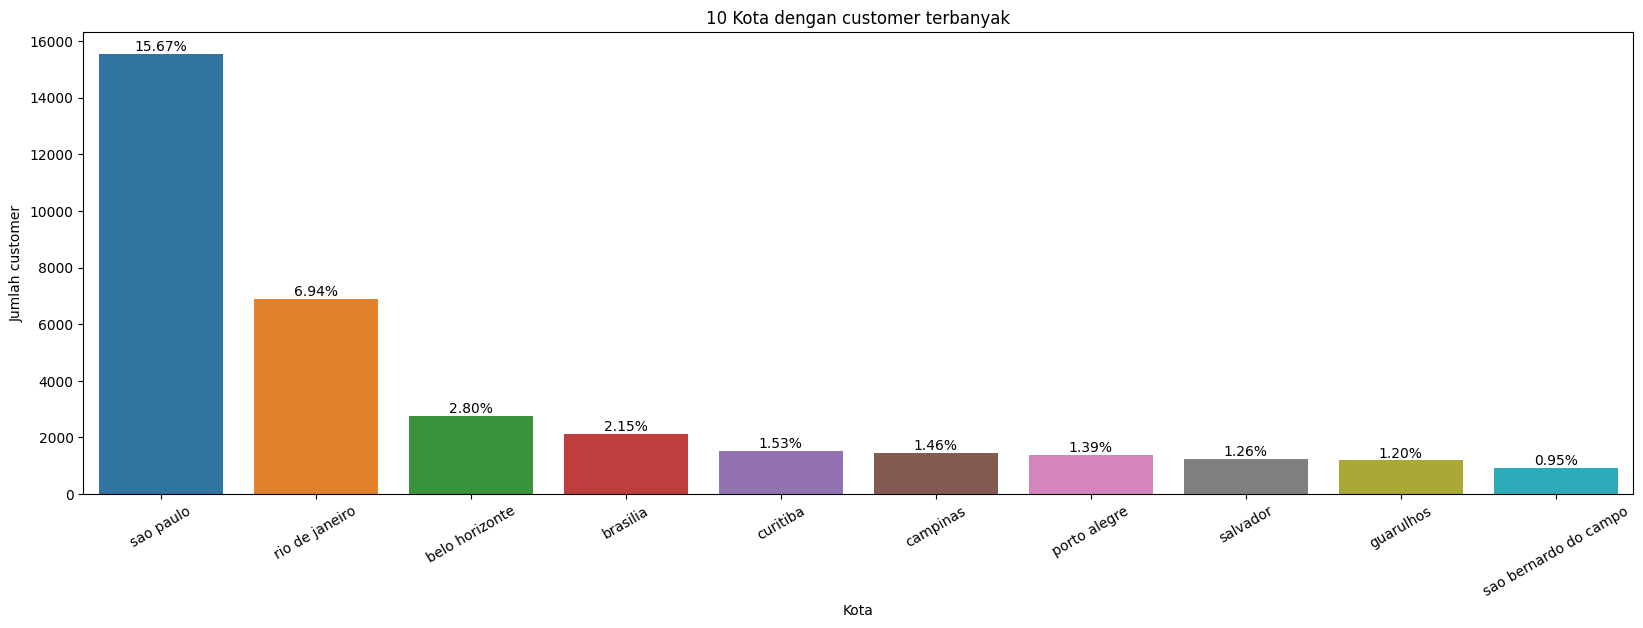

In [26]:

plt.figure(figsize=(20, 6))
g = sns.barplot(x='geolocation_city', y='count', data=top_10_cities, hue='geolocation_city', dodge=False)
plt.title('10 Kota dengan customer terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah customer')
plt.xticks(rotation=30)
for index, row in top_10_cities.iterrows():
    percentage = (row['count'] / len(locations)) * 100
    g.text(index, row['count'], f"{percentage:.2f}%", color='black', ha="center", va='bottom')

plt.show()

### Kategori Produk apa yang memiliki rata rata review skor tertinggi

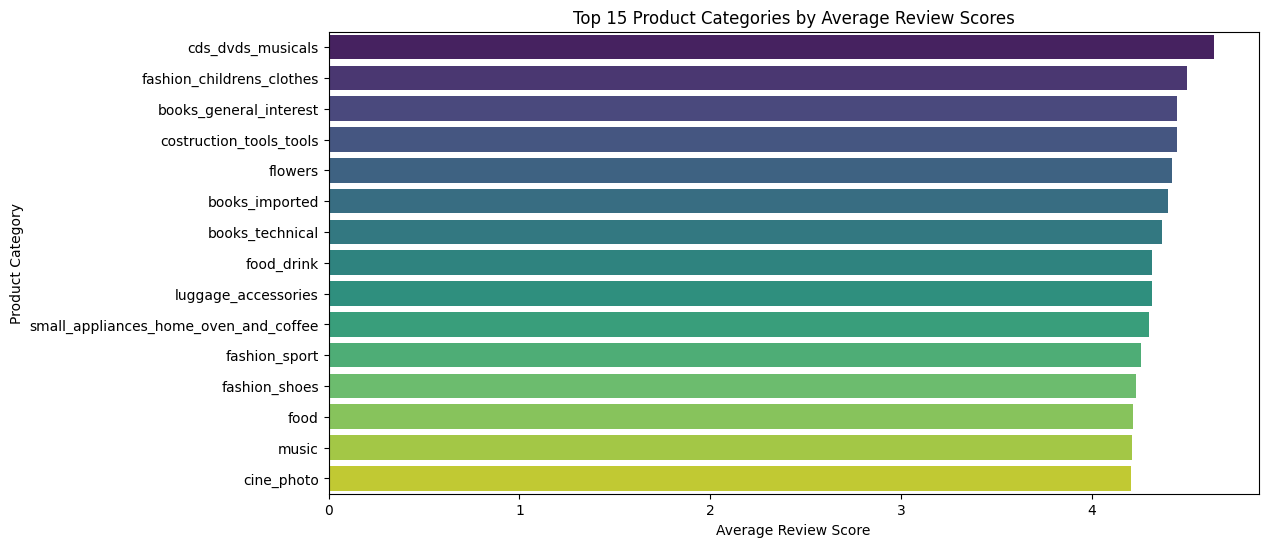

In [99]:
merged_data = pd.merge(order_items, order_reviews, on='order_id')
merged_data = pd.merge(merged_data, products, on='product_id')

category_translations = pd.read_csv(root_dir+'product_category_name_translation.csv')
merged_data = pd.merge(merged_data, category_translations, on='product_category_name', how='left')

product_avg_review_scores = merged_data.groupby('product_category_name_english')['review_score'].mean().reset_index()
product_avg_review_scores.columns = ['product_category_name_english', 'average_review_score']

top_products = product_avg_review_scores.sort_values(by='average_review_score', ascending=False).head(15)
top_products.to_csv('./dashboard/top_scores_product_category.csv')
plt.figure(figsize=(12, 6))
sns.barplot(x='average_review_score', y='product_category_name_english', data=top_products, palette='viridis',hue='product_category_name_english')
plt.title('Top 15 Product Categories by Average Review Scores')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

### Bagaimana pengaruh antara lama waktu pengiriman dan biaya pengiriman?

In [28]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

merged_data = pd.merge(orders, order_items, on='order_id')

correlation = merged_data[['delivery_time', 'freight_value']].corr()

correlation

delivery_time  freight_value
delivery_time        1.00000       -0.01759
freight_value       -0.01759        1.00000

## Conclusion

- Tren pembelian di tahun 2017 secara keseluruhan mengalami kenaikan dengan puncaknya di bulan November sebanyak 7544 pesanan lalu mengalami penurunan di bulan Desember sebanyak 24% menjadi 5673
- Metode pembayaran yang paling banyak digunakan adalah Kartu Kredit sebanyak 97% 
- Persebaran kota kustomer dengan 10 kota terbanyak yaitu dari kota sao paulo, rio de janerio, belo horizonte, curitiba, porto alegre, salvador, guarulhos, brasilia. Kota Sao Paulo menjadi kota dengan customer terbanyak sejumlah 15540
- Kategori produk yang mendapatkan rata-rata review score tertinggi adalah CD DVD Musical, Fashion Chilren Clothes, dan Book General Interest
- Korelasi antara lama waktu pengiriman dan biaya pengiriman memiliki nilai -0.01759 yang artinya jika lama waktu pengiriman bertambah maka biaya pengiriman berkurang. Namun pengaruh ini bersifat sangat lemah karena nilai korelasi mendekati nol 